<a href="https://colab.research.google.com/github/boyu571/kpc_lecture_notes/blob/master/ABC%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
########  Step.01  ########
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
########  Step.02  ########
df = pd.read_excel('project_abc.xlsx')
df

,Item코드,판매실적합계,평균재고실적,주문건수
0,2043665123,656,876,7
1,2043665130,94,37,14
2,2043665147,416,48,45
3,2045865668,180,600,38
4,2045865675,350,2350,40
...,...,...,...,...
848,2060733898,30,0,6
849,2060733904,30,0,43
850,2060733911,48,12,37
851,2060734628,48,624,46


In [11]:
########  Step.03  ########
df1 = df[['Item코드', '판매실적합계']]
df2 = df[['Item코드', '평균재고실적']]

# 장기재고
df11 = df1[df1['판매실적합계']!= 0]
df12 = df1[df1['판매실적합계']== 0]

print(len(df1))
print(len(df11))
print(len(df12))

747
106


In [12]:
########  Step.04  ########
#내림차순
df11 = df11.sort_values(by='판매실적합계',ascending=False)

#'일평균 재고수량'의 합계
Total = df11['판매실적합계'].sum()
Total

#df['비율(%)'] = df['일평균 재고수량']/'Total'
df11['비율'] = df11['판매실적합계']/Total
df11

598094

In [14]:
########  Step.05  ########
#누계비율 구하기
import itertools
df11['누계비율'] = list(itertools.accumulate(df11['비율']))
df11['누계비율(%)'] = df11['누계비율'] * 100.0
df11 = df11.round(1)
df11

,Item코드,판매실적합계,비율,누계비율,누계비율(%)
484,2052405253,30444,0.1,0.1,5.1
474,2052399644,22512,0.0,0.1,8.9
225,2049365539,22369,0.0,0.1,12.6
222,2049365164,19087,0.0,0.2,15.8
291,2050144390,18869,0.0,0.2,18.9
...,...,...,...,...,...
500,2052472422,3,0.0,1.0,100.0
729,2053791478,3,0.0,1.0,100.0
428,2051554877,2,0.0,1.0,100.0
533,2052701331,2,0.0,1.0,100.0


In [15]:
########  Step.06  ########
def func(ar) :
    if ar < 80 :
        return "A"
    elif ar >= 90:
        return "C"
    else:
        return "B"

df11['release level'] = df11['누계비율(%)'].apply(func)
df11


,Item코드,판매실적합계,비율,누계비율,누계비율(%),release level
484,2052405253,30444,0.1,0.1,5.1,A
474,2052399644,22512,0.0,0.1,8.9,A
225,2049365539,22369,0.0,0.1,12.6,A
222,2049365164,19087,0.0,0.2,15.8,A
291,2050144390,18869,0.0,0.2,18.9,A
...,...,...,...,...,...,...
500,2052472422,3,0.0,1.0,100.0,C
729,2053791478,3,0.0,1.0,100.0,C
428,2051554877,2,0.0,1.0,100.0,C
533,2052701331,2,0.0,1.0,100.0,C


In [20]:
########  Step.07  ########
# df11과 df12 합치기
df12['release level'] = "D"
df12

df11 = df11[['Item코드', 'release level']]
df12 = df12[['Item코드', 'release level']]
df1 = pd.concat([df11, df12], axis=0)
print(len(df1))
df1

853


C:\Users\boyu571\AppData\Local\Temp\ipykernel_30652\932248867.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df12['release level'] = "D"


,Item코드,release level
484,2052405253,A
474,2052399644,A
225,2049365539,A
222,2049365164,A
291,2050144390,A
...,...,...
777,2060379805,D
811,2060587309,D
812,2060587316,D
813,2060587323,D


In [21]:
########  Step.08  ########
df2 = df[['Item코드', '평균재고실적']]

# TC
df21 = df2[df2['평균재고실적']!= 0]
df22 = df2[df2['평균재고실적']== 0]

print(len(df2))
print(len(df21))
print(len(df22))

853
685
168


In [22]:
########  Step.09  ########
#내림차순
df21 = df21.sort_values(by='평균재고실적',ascending=False)

#'일평균 재고수량'의 합계
Total = df21['평균재고실적'].sum()
Total

#df['비율(%)'] = df['일평균 재고수량']/'Total'
df21['비율'] = df21['평균재고실적']/Total
df21

,Item코드,평균재고실적,비율
361,2050572285,25469,0.038577
852,2060740919,20000,0.030294
135,2048176570,18800,0.028476
484,2052405253,16268,0.024641
56,2047634897,13989,0.021189
...,...,...,...
422,2051445526,1,0.000002
88,2047954384,1,0.000002
15,2046392095,1,0.000002
120,2048024642,1,0.000002


In [23]:
########  Step.10  ########
#누계비율 구하기
import itertools
df21['누계비율'] = list(itertools.accumulate(df21['비율']))
df21['누계비율(%)'] = df21['누계비율'] * 100.0
df21 = df21.round(1)
df21

,Item코드,평균재고실적,비율,누계비율,누계비율(%)
361,2050572285,25469,0.0,0.0,3.9
852,2060740919,20000,0.0,0.1,6.9
135,2048176570,18800,0.0,0.1,9.7
484,2052405253,16268,0.0,0.1,12.2
56,2047634897,13989,0.0,0.1,14.3
...,...,...,...,...,...
422,2051445526,1,0.0,1.0,100.0
88,2047954384,1,0.0,1.0,100.0
15,2046392095,1,0.0,1.0,100.0
120,2048024642,1,0.0,1.0,100.0


In [24]:
########  Step.11  ########
def func(ar) :
    if ar < 80 :
        return "A"
    elif ar >= 90:
        return "C"
    else:
        return "B"

df21['stock level'] = df21['누계비율(%)'].apply(func)
df21


,Item코드,평균재고실적,비율,누계비율,누계비율(%),stock level
361,2050572285,25469,0.0,0.0,3.9,A
852,2060740919,20000,0.0,0.1,6.9,A
135,2048176570,18800,0.0,0.1,9.7,A
484,2052405253,16268,0.0,0.1,12.2,A
56,2047634897,13989,0.0,0.1,14.3,A
...,...,...,...,...,...,...
422,2051445526,1,0.0,1.0,100.0,C
88,2047954384,1,0.0,1.0,100.0,C
15,2046392095,1,0.0,1.0,100.0,C
120,2048024642,1,0.0,1.0,100.0,C


In [25]:
########  Step.12  ########
# df21과 df22 합치기
df22['stock level'] = "D"
df22

df21 = df21[['Item코드', 'stock level']]
df22 = df22[['Item코드', 'stock level']]
df2 = pd.concat([df21, df22], axis=0)
print(len(df2))
df2

853


C:\Users\boyu571\AppData\Local\Temp\ipykernel_30652\1645980926.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df22['stock level'] = "D"


,Item코드,stock level
361,2050572285,A
852,2060740919,A
135,2048176570,A
484,2052405253,A
56,2047634897,A
...,...,...
844,2060733850,D
846,2060733874,D
847,2060733881,D
848,2060733898,D


In [26]:
########  Step.13  ########
# df21과 df22 합치기
df_final = pd.merge(df1, df2, on='Item코드')
df_final

,Item코드,release level,stock level
0,2052405253,A,A
1,2052399644,A,A
2,2049365539,A,A
3,2049365164,A,A
4,2050144390,A,A
...,...,...,...
848,2060379805,D,C
849,2060587309,D,C
850,2060587316,D,C
851,2060587323,D,C


In [29]:
########  Step.14  ########
# pivot table 만들기
df_pivot = pd.pivot_table(df_final, index=['stock level'], columns=['release level'], values=['Item코드'], aggfunc='count', fill_value=0)

df_pivot

Item코드              
release level      A   B    C    D
stock level                       
A                 62  28   29    3
B                  7  18   51    1
C                  8  16  360  102
D                  1   2  165    0

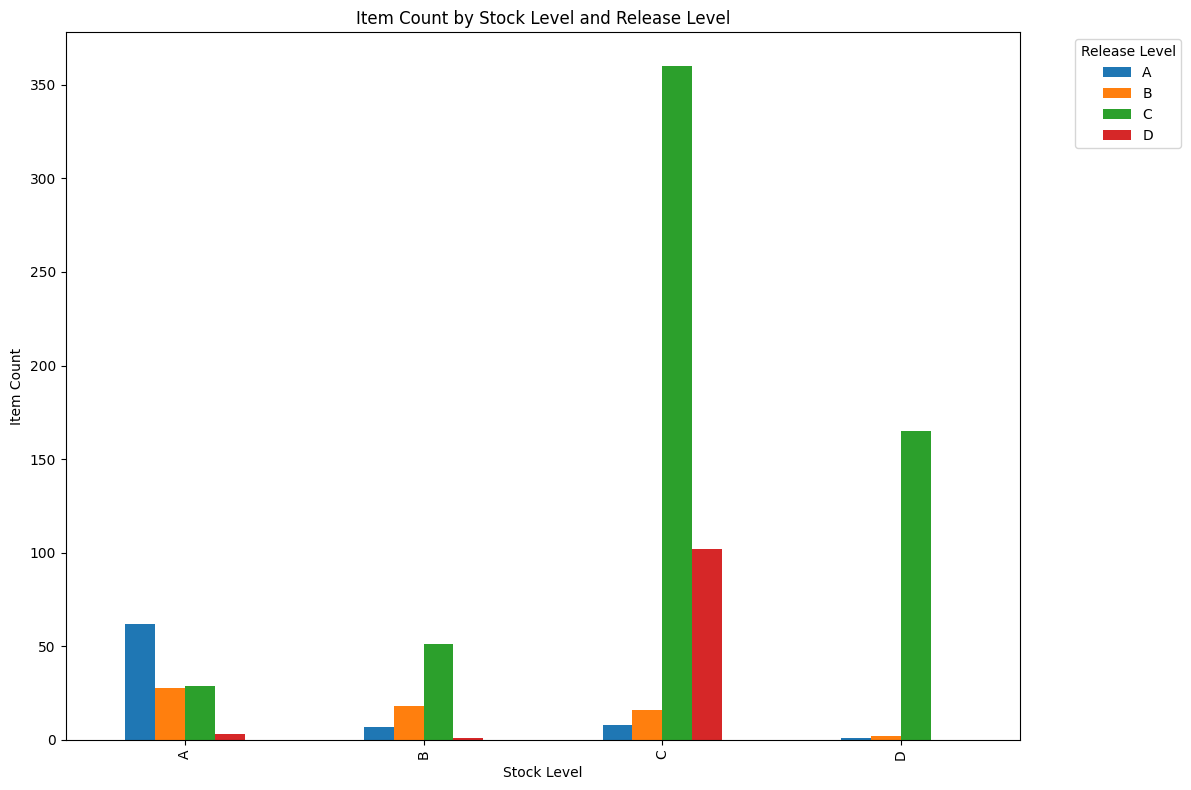

In [34]:
########  Step.15  ########
# 데이터프레임의 멀티 인덱스를 단순화하여 시각화에 사용할 수 있도록 변환
df_pivot.columns = df_pivot.columns.droplevel(0)

# 피벗 테이블 시각화
ax = df_pivot.plot(kind='bar', figsize=(12, 8))

# 그래프 제목 및 축 레이블 설정
plt.title('Stock Level and Release Level')
plt.xlabel('Stock Level')
plt.ylabel('Item Count')

# 범례 위치 설정
plt.legend(title='Release Level', bbox_to_anchor=(1.05, 1), loc='upper left')

# 그래프 출력
plt.tight_layout()
plt.show()